<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº4
#### Tobías Domenech

## Introducción

Hasta aquí hemos trabajado con señales generadas por nosotros mismos, donde sus parametros se ven determinados por la definición que nosotros querramos darles. Sin embargo, en realidad no suele trabajarse con señales donde se conozca precisamente el valor de cada uno de sus parámetros, sino la estimación de ellos. Es por ello que cobra relevancia el rol de los **estimadores**: funciones matemáticas que, basadas en los datos muestrales, buscan aproximar el valor de los parámetros desconocidos de las señal.

En este caso, trabajaremos con una señal del tipo:

$$x(n)=a_1⋅sen(Ω_1⋅n)+n_a(n)$$
 
siendo 

$$Ω_1=Ω_0+f_r⋅\frac{2π}{N}$$


$$Ω_0=\frac{π}{2}$$


y las variables aleatorias definidas por

$$f_r∼U(\frac{−1}{2},\frac{1}{2})$$


$$n_a∼N(0,σ^2)$$

Entendiendose $n_a$ como el ruido agregado a la señal (generado con una distribución normal); $\frac{2π}{N}$ como la resolución espectral ($\frac{f_s}{N}$); $Ω_0=\frac{π}{2}=\frac{f_s}{4}$ dado que $\Omega_0 = 2\pi.f_s$. Notese que en este caso, la frecuencia de la función dependerá de una variable aleatoria y, por lo tanto, no es conocido su valor exacto.

En el siguiente trabajo se simulara dicha función donde (si bien se establecerá un valor definido para $a_1$ en $\sqrt{2}$ para obtener una potencia de señal normalizada en 1 W) se buscará evaluar los estimadores:

$$\hat{a}_1^i=|X_w^i(Ω_0)|=|\mathcal{F}\{x(n) . w_i(n)\}|$$


$$\hat{Ω}_1^i=\underset{f}{\arg\max}{|X_w^i(Ω)|}$$

Donde $ w_i(n)$ será la función de ventaneo que se utilizará en cada caso (**rectangular/boxcar**,**Flattop** , **Blackmanharris** o **Hann**), utilizandosé 200 realizaciones de 1000 muestras para cada experimento y parametrizando para SNR's (relación señal-ruido) de 3 y 10 db. Dado el uso de las distintas funciones de ventaneo, se buscará analizar la repercusión de estas sobre el cálculo de los estimadores denotando la características fundamentales de un estimador: **sesgo** (diferencia entre el valor esperado del estimador y el verdadero valor del parámetro) y la **varianza** (dispersión de los valores del estimador alrederdor de su valor esperado). 

Sumado a ello, se notara el efecto del *cero-padding* (agregado de muestras cuyo valor sea cero previo a la transformación de la función ventaneada) sobre el estimador de $\hat{Ω}_1$

### 1)

Establecimiento de los parámetros a utilizar; generación de la matriz de señales (200 señales de 1000 muestras cada una con sus respectivos ruidos); generación de ventanas; ventaneo de las señales; transformación de las señales ventaneadas; gráfico de los espectros de de densidad de potencia para las señales aplicando las distintas ventanas.

<Figure size 640x480 with 0 Axes>

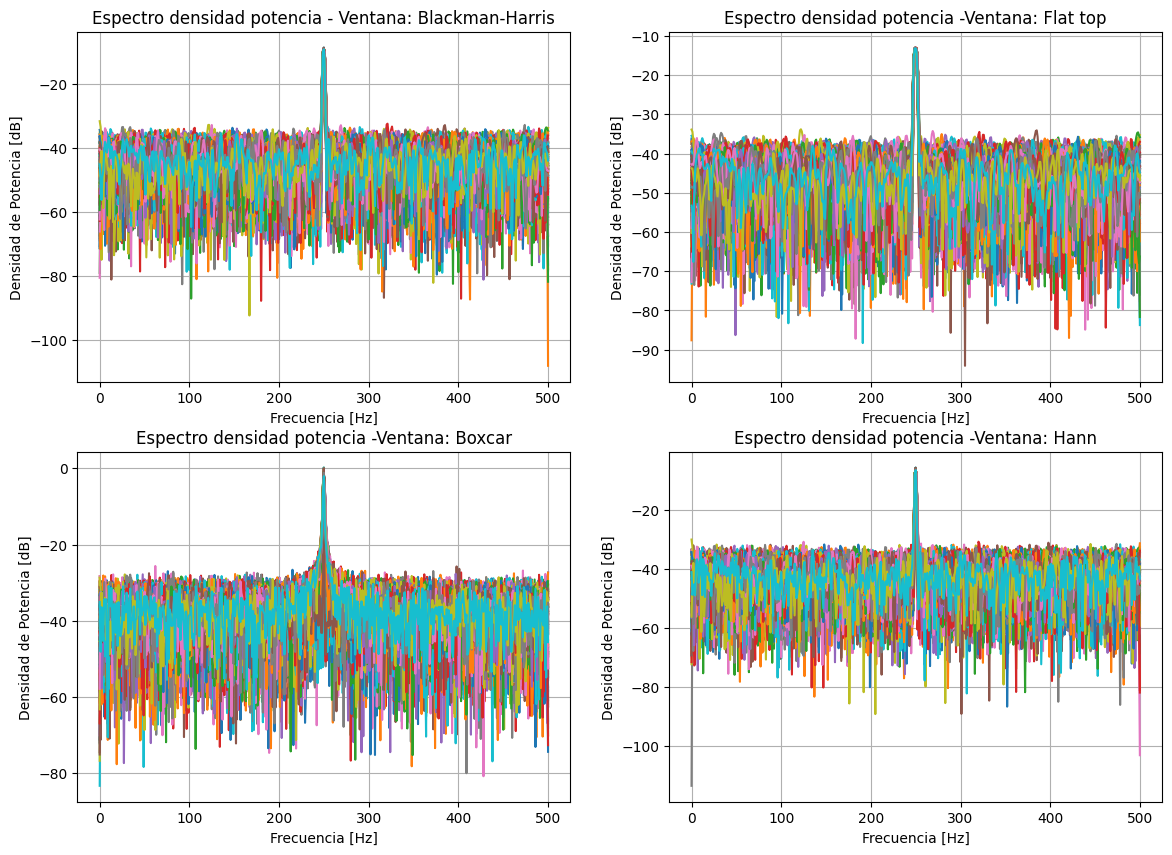

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.fft import fft, fftshift



fs =  1000 # Frecuencia de muestreo (Hz)
N = 1000 # Cantidad de muestras
nro_xp = 200 # Cantidad de realizaciones
SNR = 10 # Relación señal ruido
ts = 1/fs # Tiempo de muestreo
f0 = fs/4
df = fs/N # Resolución espectral
a1 = np.sqrt(2)


fr = np.random.uniform(-1/2,1/2,size=(1,nro_xp))

f1 = f0 + fr * df

tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
tt = np.tile(tt, nro_xp)

s = a1 * np.sin(2*np.pi*tt*f1) # Señal generada

nn = np.random.normal(0,np.sqrt(10**(-1*SNR/10)),size=(N,nro_xp)) # Ruido
   
sr = s + nn # Señal con ruido


#Genero ventanas

w_BKH = signal.windows.blackmanharris(N).reshape((N,1))
w_Flatt = signal.windows.flattop(N).reshape((N,1))
w_Box = signal.windows.boxcar(N).reshape((N,1))
w_Hann = signal.windows.hann(N).reshape((N,1))


# Ventaneo señal

sBKH = sr * w_BKH
sflatt = sr * w_Flatt
sbox = sr * w_Box
shann = sr * w_Hann

# Transformo y calculo modulo de la fft

fft_BKH = np.abs(1/N * np.fft.fft(sBKH , N , axis = 0))
fft_flatt = np.abs(1/N * np.fft.fft(sflatt , N , axis = 0))
fft_box = np.abs(1/N * np.fft.fft(sbox , N , axis = 0)) 
fft_hann = np.abs(1/N * np.fft.fft(shann, N, axis = 0))

plt.figure(2)
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_BKH[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia - Ventana: Blackman-Harris')
plt.grid(visible='True')

plt.subplot(2,2,2)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_flatt[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Flat top')
plt.grid(visible='True')

plt.subplot(2,2,3)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_box[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Boxcar')
plt.grid(visible='True')

plt.subplot(2,2,4)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_hann[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Hann')
plt.grid(visible='True')


### 2)

Calculo del estimador $\hat{a}_1$ según las diversas ventanas y generación de los histogramas correspondientes.

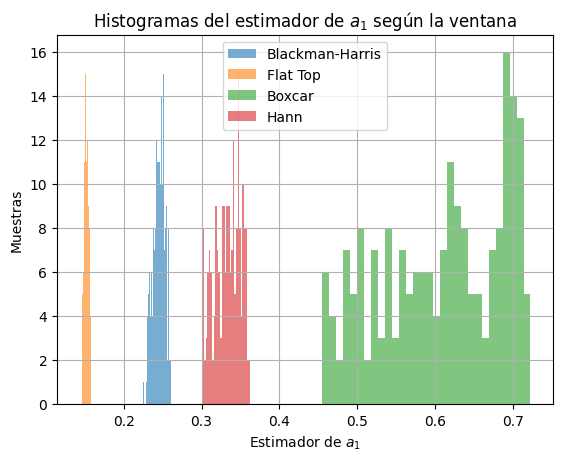

In [26]:


# Quiero el estimador de a1, para ello debo tomar la fila 250 (N/4), en cada ventana.

a1_BKH = fft_BKH[250]
a1_flatt = fft_flatt[250]
a1_box = fft_box[250]
a1_hann = fft_hann[250]

# Histograma de los estimadores a1

plt.figure(3)
bins = 30 

plt.hist(a1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(a1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(a1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(a1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $a_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $a_1$ según la ventana')
plt.legend()
plt.grid(True)
plt.show()
    
   

### Resultados:

Gráficamente se aprecia una relación inversa entre sesgo y varianza en el cálculo del estimador $\hat{a}_1$ según la ventana utilizada: a mayor sesgo en el estimador, su varianza resulta menor. Sobresale aquí la ventana Flattop dada su poca varianza pese a su sesgo (recordar que el valor establecido de $a_1$ fue de $\sqrt{2}$).

### 3)

Calculo analaítico del sesgo y la varianza de  $\hat{a}_1$; calculo del estimador $\hat{Ω}_1; gráfico de los histogramas del estimador según la ventana en uso. 

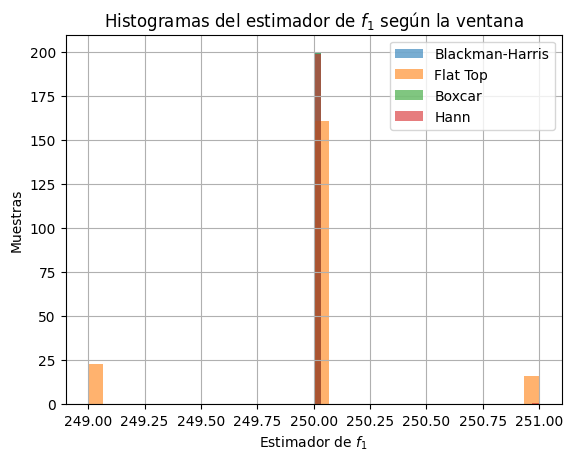

In [27]:
# Calculo los sesgos de los estimadores a1

sesgo_a1_BKH = np.mean(a1_BKH)-a1
sesgo_a1_flatt = np.mean(a1_flatt)-a1
sesgo_a1_box = np.mean(a1_box)-a1
sesgo_a1_hann = np.mean(a1_hann)-a1

sesgos_a1 = [ sesgo_a1_BKH, sesgo_a1_flatt, sesgo_a1_box, sesgo_a1_hann]


# Calculo varianza de los estimadores a1

varianza_a1_BKH = np.var(a1_BKH)
varianza_a1_flatt = np.var(a1_flatt)
varianza_a1_box = np.var(a1_box)
varianza_a1_hann = np.var(a1_hann)

varianzas_a1 = [varianza_a1_BKH, varianza_a1_flatt, varianza_a1_box, varianza_a1_hann]


#### Busco el estimador de omega 1

arg_BKH = np.argmax(fft_BKH[:N//2, : ], axis = 0)
arg_flatt = np.argmax(fft_flatt[:N//2, : ], axis = 0)
arg_box = np.argmax(fft_box[:N//2, : ], axis = 0)
arg_hann = np.argmax(fft_hann[:N//2, : ], axis = 0)


f1_BKH = arg_BKH * df
f1_flatt = arg_flatt * df
f1_box = arg_box * df
f1_hann = arg_hann * df

# Histograma de los estimadores f1

plt.figure(4)

plt.hist(f1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(f1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(f1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(f1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $f_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $f_1$ según la ventana')
plt.legend()
plt.grid(True)
plt.show()

### Resultados: 

En el caso del estimador $\hat{Ω}_1$, las distintas ventanas utilizadas aparentan mostrar tanto una varianza como sesgo similares (exceptuando el caso de la Flattop).

### 4)

Cálculo analítico de del sesgo y varianza del estimador $\hat{Ω}_1$; generación de tabla con los valores de sesgo y varianza de cada estimador para cada ventana.

In [28]:
omega1 = np.mean(f1)

# Calculo los sesgos de los estimadores f1

sesgo_f1_BKH = np.mean(f1_BKH)- omega1
sesgo_f1_flatt = np.mean(f1_flatt)- omega1
sesgo_f1_box = np.mean(f1_box)- omega1
sesgo_f1_hann = np.mean(f1_hann)- omega1

sesgos_f1 = [sesgo_f1_BKH, sesgo_f1_flatt,  sesgo_f1_box, sesgo_f1_hann ]

# Calculo las varianzas de los estimadores f1

varianza_f1_BKH = np.var(f1_BKH)
varianza_f1_flatt = np.var(f1_flatt)
varianza_f1_box = np.var(f1_box)
varianza_f1_hann = np.var(f1_hann)

varianzas_f1 = [varianza_f1_BKH, varianza_f1_flatt, varianza_f1_box, varianza_f1_hann]

# Genero tabla donde se muestran los sesgos y varianzas para cada estimador según la ventana utilizada.

ventanas = ["BKH","Flat-Top","Box","Hann"]


tabla1 = pd.DataFrame({
    "Ventana": ventanas,
    "Sesgo de a1": sesgos_a1,
    "Varianza de a1": varianzas_a1,
    "Sesgo de omega1": sesgos_f1,
    "Varianza de omega1": varianzas_f1
})
pd.options.display.float_format = '{:.2e}'.format
tabla1.set_index("Ventana", inplace=True)

print("\n\t\t Tabla: Sesgo y Varianza de Estimadores con SNR = {:d} dB \n".format(SNR))
print(tabla1)
print("\n")


		 Tabla: Sesgo y Varianza de Estimadores con SNR = 10 dB 

          Sesgo de a1  Varianza de a1  Sesgo de omega1  Varianza de omega1
Ventana                                                                   
BKH         -1.17e+00        5.66e-05        -4.34e-03            0.00e+00
Flat-Top    -1.26e+00        8.49e-06        -3.93e-02            1.94e-01
Box         -8.06e-01        6.09e-03        -4.34e-03            0.00e+00
Hann        -1.08e+00        2.67e-04         6.58e-04            4.97e-03




### Resultados:

Se manifiesta la tendencia antedicha en cuanto al comportamiento del sesgo y varianza del estimador $\hat{a}_1$ presentando la Flattop la menor varianza para dicho estimador. En el caso del estimador $\hat{Ω}_1$ las ventanas de Blackmann-Harris y Hann obtienen el mismo valor de varianza, por su parte Flattop presenta la mayor variancia de las ventanas.

### 5)

Regeneración de los estimadores $\hat{Ω}_1$, con sus respectivos histogramas, y reestructuración de la tabla de estimadores para cada ventana, utilizando el método de cero-padding.

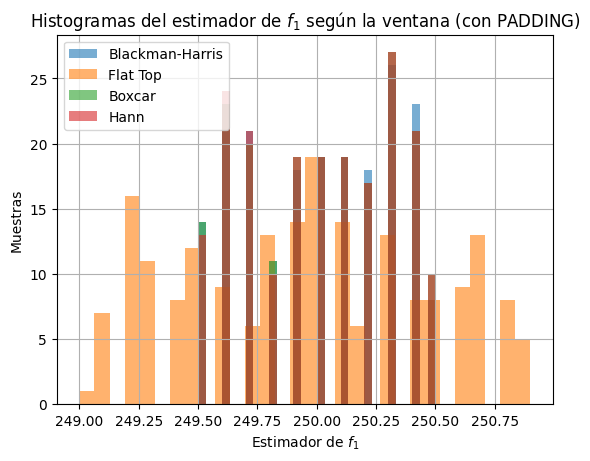

In [29]:
N2 = 10000 # Defino para hacer un 0 padding y campiar resolucion espectral

fft_BKH = np.abs(1/N * np.fft.fft(sBKH, n= N2, axis = 0))
fft_flatt = np.abs(1/N * np.fft.fft(sflatt, n= N2, axis = 0))
fft_box = np.abs(1/N * np.fft.fft(sbox, n= N2, axis = 0)) 
fft_hann = np.abs(1/N * np.fft.fft(shann, n= N2, axis = 0))

arg_BKH = np.argmax(fft_BKH[:N2//2, : ], axis = 0)
arg_flatt = np.argmax(fft_flatt[:N2//2, : ], axis = 0)
arg_box = np.argmax(fft_box[:N2//2, : ], axis = 0)
arg_hann = np.argmax(fft_hann[:N2//2, : ], axis = 0)

df = fs/N2

f1_BKH = arg_BKH * df
f1_flatt = arg_flatt * df
f1_box = arg_box * df
f1_hann = arg_hann * df

plt.figure(5)

plt.hist(f1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(f1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(f1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(f1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $f_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $f_1$ según la ventana (con PADDING)')
plt.legend()
plt.grid(True)
plt.show()
    

In [30]:
sesgo_f1_BKH = np.mean(f1_BKH)- omega1
sesgo_f1_flatt = np.mean(f1_flatt)- omega1
sesgo_f1_box = np.mean(f1_box)- omega1
sesgo_f1_hann = np.mean(f1_hann)- omega1

sesgos_f1 = [sesgo_f1_BKH, sesgo_f1_flatt,  sesgo_f1_box, sesgo_f1_hann ]

varianza_f1_BKH = np.var(f1_BKH)
varianza_f1_flatt = np.var(f1_flatt)
varianza_f1_box = np.var(f1_box)
varianza_f1_hann = np.var(f1_hann)

varianzas_f1 = [varianza_f1_BKH, varianza_f1_flatt, varianza_f1_box, varianza_f1_hann]

tabla2 = pd.DataFrame({
    "Ventana": ventanas,
    "Sesgo de a1": sesgos_a1,
    "Varianza de a1": varianzas_a1,
    "Sesgo de omega1": sesgos_f1,
    "Varianza de omega1": varianzas_f1
})

tabla2.set_index("Ventana", inplace=True)

print("\n\t Tabla: Sesgo y Varianza de Estimadores con SNR = {:d} dB (con PADDING omega1)\n".format(SNR))
print(tabla2)
print("\n")


	 Tabla: Sesgo y Varianza de Estimadores con SNR = 10 dB (con PADDING omega1)

          Sesgo de a1  Varianza de a1  Sesgo de omega1  Varianza de omega1
Ventana                                                                   
BKH         -1.17e+00        5.66e-05        -4.34e-03            9.31e-02
Flat-Top    -1.26e+00        8.49e-06        -4.88e-02            2.70e-01
Box         -8.06e-01        6.09e-03        -1.84e-03            9.38e-02
Hann        -1.08e+00        2.67e-04        -1.84e-03            9.36e-02




### Resultados:

Gráficamente, se aprecia una aperente mejora en la resolución espectral de los histogramas dada la implementación del cero-padding. Los resultados tabulados ponen de manifiesto un aumento de la varianza y disminución del sesgo para el estimador $\hat{\Omega}_1$ de cada una de las ventanas.
Notese que, visto en los histogramas, la distribución de los valores que se obtienen para las ventanas de Blackmann-Harris, Hann y Boxcar se encuentran en un rango de $[\frac{-1}{2} ; \frac{1}{2}]$ respecto de un valor central, lo cual hace sugerencia al rango de la ditribución uniforme establecida para definir la frecuencia de las señales.

### 6)

Repetición de todos los pasos realizados anteriormente pero con una relación SNR = 3db.

<Figure size 640x480 with 0 Axes>

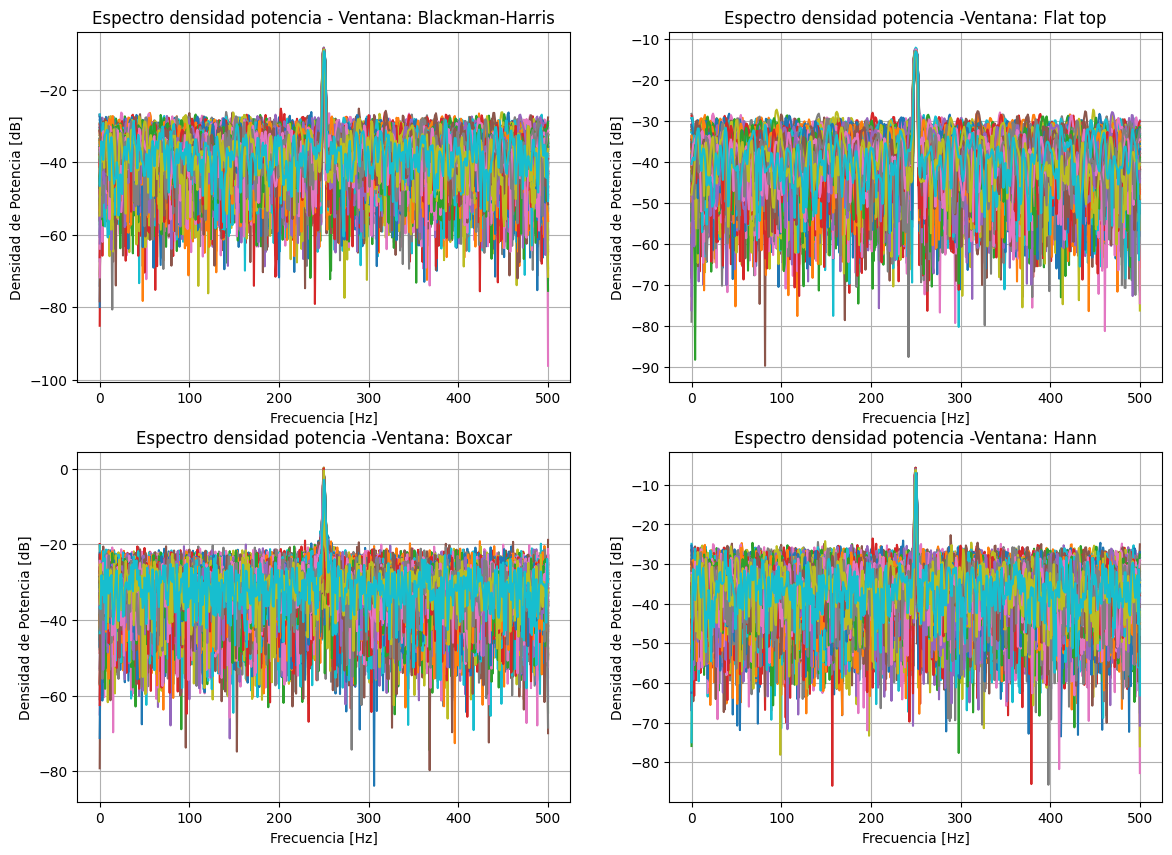

In [31]:

fs =  1000 # Frecuencia de muestreo (Hz)
N = 1000 # Cantidad de muestras
nro_xp = 200 # Cantidad de realizaciones
SNR = 3 # Relación señal ruido
ts = 1/fs # Tiempo de muestreo
f0 = fs/4
df = fs/N # Resolución espectral
a1 = np.sqrt(2)


fr = np.random.uniform(-1/2,1/2,size=(1,nro_xp))

f1 = f0 + fr * df

tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
tt = np.tile(tt, nro_xp)

s = a1 * np.sin(2*np.pi*tt*f1) # Señal generada

nn = np.random.normal(0,np.sqrt(10**(-1*SNR/10)),size=(N,nro_xp)) # Ruido
   
sr = s + nn # Señal con ruido


#Genero ventanas

w_BKH = signal.windows.blackmanharris(N).reshape((N,1))
w_Flatt = signal.windows.flattop(N).reshape((N,1))
w_Box = signal.windows.boxcar(N).reshape((N,1))
w_Hann = signal.windows.hann(N).reshape((N,1))


# Ventaneo señal

sBKH = sr * w_BKH
sflatt = sr * w_Flatt
sbox = sr * w_Box
shann = sr * w_Hann

# Transformo y calculo modulo de la fft

fft_BKH = np.abs(1/N * np.fft.fft(sBKH , N , axis = 0))
fft_flatt = np.abs(1/N * np.fft.fft(sflatt , N , axis = 0))
fft_box = np.abs(1/N * np.fft.fft(sbox , N , axis = 0)) 
fft_hann = np.abs(1/N * np.fft.fft(shann, N, axis = 0))

plt.figure(2)
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_BKH[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia - Ventana: Blackman-Harris')
plt.grid(visible='True')

plt.subplot(2,2,2)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_flatt[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Flat top')
plt.grid(visible='True')

plt.subplot(2,2,3)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_box[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Boxcar')
plt.grid(visible='True')

plt.subplot(2,2,4)
plt.plot( ff[bfrec], 10* np.log10(2*(fft_hann[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Espectro densidad potencia -Ventana: Hann')
plt.grid(visible='True')


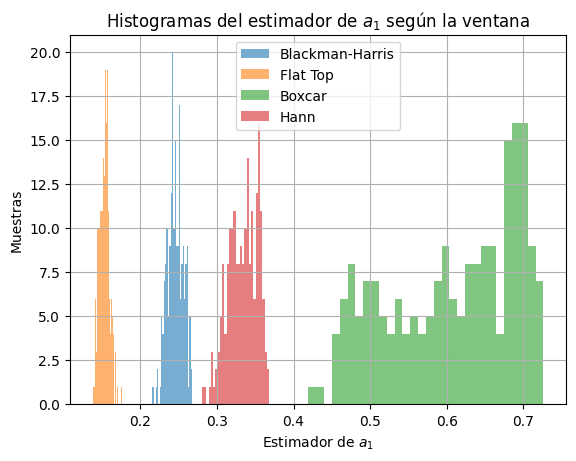

In [32]:


# Quiero el estimador de a1, para ello debo tomar la fila 250 (N/4), en cada ventana.

a1_BKH = fft_BKH[250]
a1_flatt = fft_flatt[250]
a1_box = fft_box[250]
a1_hann = fft_hann[250]

# Histograma de los estimadores a1

plt.figure(3)
bins = 30 

plt.hist(a1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(a1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(a1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(a1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $a_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $a_1$ según la ventana')
plt.legend()
plt.grid(True)
plt.show()
    
   

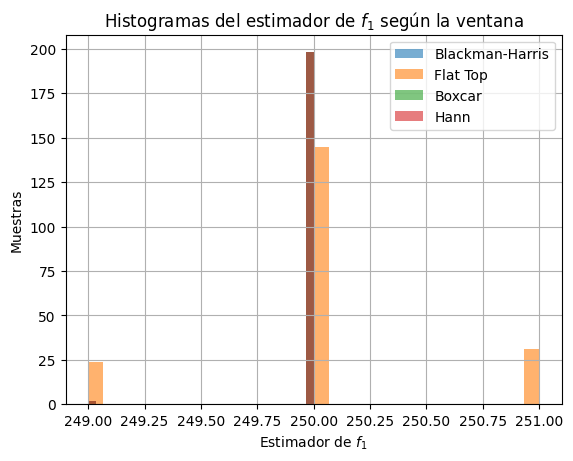

In [33]:
# Calculo los sesgos de los estimadores a1

sesgo_a1_BKH = np.mean(a1_BKH)-a1
sesgo_a1_flatt = np.mean(a1_flatt)-a1
sesgo_a1_box = np.mean(a1_box)-a1
sesgo_a1_hann = np.mean(a1_hann)-a1

sesgos_a1 = [ sesgo_a1_BKH, sesgo_a1_flatt, sesgo_a1_box, sesgo_a1_hann]


# Calculo varianza de los estimadores a1

varianza_a1_BKH = np.var(a1_BKH)
varianza_a1_flatt = np.var(a1_flatt)
varianza_a1_box = np.var(a1_box)
varianza_a1_hann = np.var(a1_hann)

varianzas_a1 = [varianza_a1_BKH, varianza_a1_flatt, varianza_a1_box, varianza_a1_hann]


#### Busco el estimador de omega 1

arg_BKH = np.argmax(fft_BKH[:N//2, : ], axis = 0)
arg_flatt = np.argmax(fft_flatt[:N//2, : ], axis = 0)
arg_box = np.argmax(fft_box[:N//2, : ], axis = 0)
arg_hann = np.argmax(fft_hann[:N//2, : ], axis = 0)


f1_BKH = arg_BKH * df
f1_flatt = arg_flatt * df
f1_box = arg_box * df
f1_hann = arg_hann * df

# Histograma de los estimadores f1

plt.figure(4)

plt.hist(f1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(f1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(f1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(f1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $f_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $f_1$ según la ventana')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
omega1 = np.mean(f1)

# Calculo los sesgos de los estimadores f1

sesgo_f1_BKH = np.mean(f1_BKH)- omega1
sesgo_f1_flatt = np.mean(f1_flatt)- omega1
sesgo_f1_box = np.mean(f1_box)- omega1
sesgo_f1_hann = np.mean(f1_hann)- omega1

sesgos_f1 = [sesgo_f1_BKH, sesgo_f1_flatt,  sesgo_f1_box, sesgo_f1_hann ]

# Calculo las varianzas de los estimadores f1

varianza_f1_BKH = np.var(f1_BKH)
varianza_f1_flatt = np.var(f1_flatt)
varianza_f1_box = np.var(f1_box)
varianza_f1_hann = np.var(f1_hann)

varianzas_f1 = [varianza_f1_BKH, varianza_f1_flatt, varianza_f1_box, varianza_f1_hann]

# Genero tabla donde se muestran los sesgos y varianzas para cada estimador según la ventana utilizada.

ventanas = ["BKH","Flat-Top","Box","Hann"]


tabla1 = pd.DataFrame({
    "Ventana": ventanas,
    "Sesgo de a1": sesgos_a1,
    "Varianza de a1": varianzas_a1,
    "Sesgo de omega1": sesgos_f1,
    "Varianza de omega1": varianzas_f1
})
pd.options.display.float_format = '{:.2e}'.format
tabla1.set_index("Ventana", inplace=True)

print("\n\t\t Tabla: Sesgo y Varianza de Estimadores con SNR = {:d} dB \n".format(SNR))
print(tabla1)
print("\n")


		 Tabla: Sesgo y Varianza de Estimadores con SNR = 3 dB 

          Sesgo de a1  Varianza de a1  Sesgo de omega1  Varianza de omega1
Ventana                                                                   
BKH         -1.17e+00        1.10e-04        -7.12e-02            9.90e-03
Flat-Top    -1.26e+00        4.17e-05        -2.62e-02            2.74e-01
Box         -8.06e-01        6.84e-03        -7.12e-02            9.90e-03
Hann        -1.08e+00        3.56e-04        -7.12e-02            9.90e-03




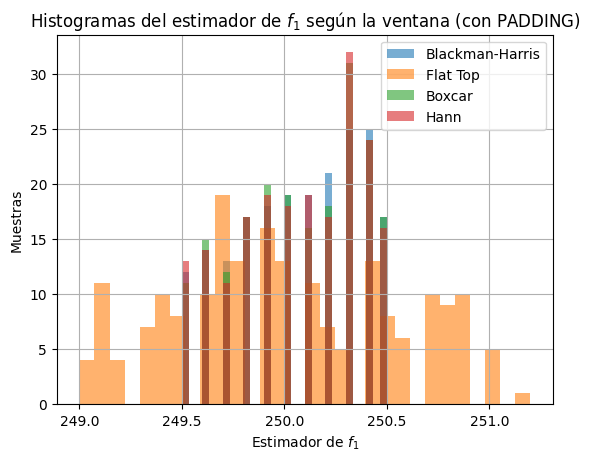

In [35]:
N2 = 10000 # Defino para hacer un 0 padding y campiar resolucion espectral

fft_BKH = np.abs(1/N * np.fft.fft(sBKH, n= N2, axis = 0))
fft_flatt = np.abs(1/N * np.fft.fft(sflatt, n= N2, axis = 0))
fft_box = np.abs(1/N * np.fft.fft(sbox, n= N2, axis = 0)) 
fft_hann = np.abs(1/N * np.fft.fft(shann, n= N2, axis = 0))

arg_BKH = np.argmax(fft_BKH[:N2//2, : ], axis = 0)
arg_flatt = np.argmax(fft_flatt[:N2//2, : ], axis = 0)
arg_box = np.argmax(fft_box[:N2//2, : ], axis = 0)
arg_hann = np.argmax(fft_hann[:N2//2, : ], axis = 0)

df = fs/N2

f1_BKH = arg_BKH * df
f1_flatt = arg_flatt * df
f1_box = arg_box * df
f1_hann = arg_hann * df

plt.figure(5)

plt.hist(f1_BKH, bins=bins, alpha=0.6, label='Blackman-Harris')
plt.hist(f1_flatt, bins=bins, alpha=0.6, label='Flat Top')
plt.hist(f1_box, bins=bins, alpha=0.6, label='Boxcar')
plt.hist(f1_hann, bins=bins, alpha=0.6, label='Hann')

plt.xlabel('Estimador de $f_1$')
plt.ylabel('Muestras')
plt.title('Histogramas del estimador de $f_1$ según la ventana (con PADDING)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
sesgo_f1_BKH = np.mean(f1_BKH)- omega1
sesgo_f1_flatt = np.mean(f1_flatt)- omega1
sesgo_f1_box = np.mean(f1_box)- omega1
sesgo_f1_hann = np.mean(f1_hann)- omega1

sesgos_f1 = [sesgo_f1_BKH, sesgo_f1_flatt,  sesgo_f1_box, sesgo_f1_hann ]

varianza_f1_BKH = np.var(f1_BKH)
varianza_f1_flatt = np.var(f1_flatt)
varianza_f1_box = np.var(f1_box)
varianza_f1_hann = np.var(f1_hann)

varianzas_f1 = [varianza_f1_BKH, varianza_f1_flatt, varianza_f1_box, varianza_f1_hann]

tabla2 = pd.DataFrame({
    "Ventana": ventanas,
    "Sesgo de a1": sesgos_a1,
    "Varianza de a1": varianzas_a1,
    "Sesgo de omega1": sesgos_f1,
    "Varianza de omega1": varianzas_f1
})

tabla2.set_index("Ventana", inplace=True)

print("\n\t Tabla: Sesgo y Varianza de Estimadores con SNR = {:d} dB (con PADDING omega1)\n".format(SNR))
print(tabla2)
print("\n")


	 Tabla: Sesgo y Varianza de Estimadores con SNR = 3 dB (con PADDING omega1)

          Sesgo de a1  Varianza de a1  Sesgo de omega1  Varianza de omega1
Ventana                                                                   
BKH         -1.17e+00        1.10e-04        -4.24e-03            9.08e-02
Flat-Top    -1.26e+00        4.17e-05        -5.97e-02            3.04e-01
Box         -8.06e-01        6.84e-03        -7.38e-04            9.07e-02
Hann        -1.08e+00        3.56e-04        -2.24e-03            9.12e-02




### Resultados:

La repetición de todos los pasos, con la variación de la SNR a 3 dB, arroja como resultado más interesante el aumento en la varianza de los estimadores.

# Conclusiones:

- Dada la manera de calcular los estimadores que se ha utilizado, en el caso del estimador $\hat{a}_1$, el "mejor" resultado se obtiene a partir del tratamiento de la señal con la ventana Flattop dado que presenta la menor varianza de todos los casos planteados. Si bien su sesgo es de una dimensión considerable, no representa un problema mayor dado que su corrección puede realizarse con un escalamiento.

- Para el estimador $\hat{a}_1$ se presenta una relación entre varianza y sesgo interesante: conseguir menor varianza es a costo de aumentar el sesgo (hehco visible con los histogramas de las distintas funciones ventaneadas).

- La aplicación del *cero-padding*, a la hora de calcular el estimador $\hat{\Omega}_1$, trae aparejado un aparente aumento en la resolución espectral, representado en los histogramas (entiendase aparente porque el numero de muestras que aportan información se mantiene igual, dado que lo que se agregan son ceros). En lo referente a las características del estimador, el cero-padding acarrea un aumento de varianza y disminución en el sesgo.

- La realización de la misma experiencia con una relación señal-ruido (SNR) de valor igual a 3dB resulta en una modificación (aumento) en el valor de la varianza de los distintos estimadores, viendose poca afección sobre el sesgo de estos mismos.